#Instructions on using this notebook

Replace the working directory below with the one you have CCAlgebra_mk4.py located.

In [2]:
from IPython.display import display, Math, Latex 
%matplotlib inline  
#%cd '' #insert full path here
%run CCAlgebra_mk4.py


##Coupled Cluster Diagrammatic Algebra 
####A python script for learning and developing code for CC calculations 
####Audun Skau Hansen | Comp-Phys | UiO | 2015

*"Because of the often large number of terms in all versions of the CCM it is rather hard work to obtain the explicit equations by hand. And after this is done one has to write a program to put them into the computer."* - H. G. Kümmel

The code imported in this notebook is intended to provide an environment for deriving CC equations, complementary code and diagrams using the diagrammatic approach outlined in Shavitt and Bartlett (S-B) (p. 292). The code is mainly written for educational purposes, and has not been extensively tested, optimized or cleaned.

The core operation in CCAlgebra is to extract diagrams from contractions of operators. A lot of physicists in the field of many body quantum mechanics appreciate the simplicity and richness of working with diagrammatic rules alongside second quantization. This code is an attempt to translate these diagrammatic rules into operations understandable by the computer, so we may utilize these rules to generate the full complexity of CC equations of any truncation, for very general normal ordered hamiltonians. (All operators defined in this code is assumed to be normal ordered - this is explained in more detail below. )

The following series of examples is meant to illustrate some of the potential of the code, and at the same time function as a tutorial for anyone who wish to use it to derive other equations or diagrams. A fundamental understanding of second quantization, diagrams and the CC method is a prerequisite.

I hope to continue the developement of this code after I hand in my thesis this summer.

### 1. Defining operators - Operator()

The operators we work with here are the cluster operators (T_1, T_2 ...) and the hamiltonian operators. Normal ordering of the hamiltonian for a system of interacting particles will typically produce a number of parts, each corresponding to a diagrammatic filament. This is discussed in more detail in S-B (p. 112, 4.29). *(By filament, I mean a single, unconnected operator, that in itself would not produce any contribution when evaluated on the vacuum state.)*

In CCalgebra operators are defined as shown below. The hamiltonian filament given here corresponds to the last diagram on page 180 in S-B, (9.105).

In [4]:
#How to define operators
H   = Operator([1,-1],[])      # The first list defines q-particle annihilations (below interaction),
                               # while the second is creations. Particles and holes are indicated by 1 and -1 respectively.
    
T_1 = Operator([],[1,-1])      #The T_1 cluster operator
T_2 = Operator([],[1,1,-1,-1]) #The T_2 operator; all lists must be normal ordered

Note that the q-particle operators are given in normal order - q-particle creation operators to the left.

### 2. Connecting operators - O()

Operators may be diagrammatically connected by applying the rules laid out in S-B (p.298-299). The implementation in CCAlgebra uses the permutations library of python to produce all possible ways of connecting the diagrams, whereby it sorts out the distinct diagrams. 

The basic rules are that all lines below the hamiltonian filament must connect to the one of the cluster operators, and all cluster operators must be connected to the hamiltonian filament. When this connection of operators acts on the vacuum state, it may produce an excitation or it may leave the vacuum state at the same energy level. 

A class object O(O1, [O2, O3, ...]) is defined and will contain all distinct ways of connecting the operators. (The name should probably be changed to something more explanatory such as "connections()". An example is given by connecting the previously defined operators:

In [5]:
contraction = O(H,[T_1]) #The second argument must be a list of operators (T_1 * T_1 = [T_1, T_1])

### 3. Display and interpret results

All results may be displayed as (1) latex, (2) diagrams (3) a piece of ("naïve") C++ code, or simply (4) a report of how the contraction was interpreted by O(). This last functionality is meant to assist in the debugging process.



### 3.1 Excitation level and number of diagrams

A connection of operators will in principle produce a new set of operators, which share a common property understood as the excitation level of the operators. Any operator in second quantization have this property, and it is easily evaluated by counting the number of lines exiting the operator and subtracting the the number of lines entering the operator. The excitation level is this number divided by 2, as the interaction should leave the number of particles constant. 

Considering the connection made above, we may evaluate the excitation level as well as the number of distinct diagrams produced in the connection: 

In [6]:
print "Excitation:", contraction.E() #Excitation energy of connected operators
print "Number of distinct diagrams:", contraction.N

Excitation: 0.0
Number of distinct diagrams: 1


### 3.2 Mathematical representation

We may then interpret the 0th (the only) connection produced as a latex formatted string:

In [7]:
c_tex = contraction.latex(0) #The first of possibly multiple distinct diagrams in latex format.
Math(c_tex)

<IPython.core.display.Math object>

Compare this sum to the middle upper diagram on page 297 in S-B. As the final excitation of this diagram is 0, it will contribute to the energy equation. Note that while S-B makes an exception in the labelling of internal lines in the energy diagrams, CCAlgebra does not make this distinction. (S-B reserves the labels *a,b,i,j* for target indices in general, except for the energy contribution.)

**Note:** It is unfortunate to use the "double vertical bar" (antisymmetric) notation for the single particle energy as in the case above. This is one of many minor details that will be corrected in later versions of the code.

### 3.3 Diagrammatic representation

To compare the sum to its diagrammatic counterpart, we write:

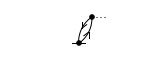

In [8]:
contraction.diagram(0, [0,0], True) #Display diagram 0 at position x/y = [0,0] using internal show() function (matplotlib)

The diagram above is identical to the one in S-B, page 297. The dotted line represents the the interaction (H), while the horizontal straight line denotes the $T_1$ cluster operator. All lines are connected in the diagram above.

In general, CCAlgebra should produce diagrams *indistinct* to those found in S-B. In other words, some discrepancies in features might occur when comparing, but these discrepancies will not affect the outcome of any CC calculation.

There are two different options for displaying diagrams. The last parameter in the function call above is set to "True" to indicate that the diagram is to be both plotted and "show()"n by the O() class. The list containing two zeros is the position of the diagram in the x,y plane. The code is written this way to enable plotting of multiple diagrams in the same figure. (See the example in section 3.5 on how to use this in other ways).

### 3.4 Computational representation

We may now retrieve the C++ code for this diagram, by writing:

In [9]:
print contraction.code(0)


double CCa = 0.0;
for(int k = 0; k < nElectrons; k ++){
    for(int c = nElectrons; c < nStates; c ++){
        CCa += vmin1(k)(c)*tf1(c)(k);
    }
}
CCa *= 1.000000;



This code may be implemented in a class in any CC-implementation in C++, but note that it is in itself not a complete class. This functionality is under developement, and will be implemented later on.


### 3.5 Summary of representations.

To summarize the different representations, we may do the same process once more for a more complex set of operators:

In [10]:
H = Operator([1,1,-1],[1])
contraction = O(H,[T_1, T_2]) #The second argument must be a list of operators (T_1 * T_1 = [T_1, T_1])c_tex = contraction.latex(0) #The first of possibly multiple distinct diagrams in latex format.
c_tex = contraction.latex(0) #The first of possibly multiple distinct diagrams in latex format.
Math(c_tex)

<IPython.core.display.Math object>

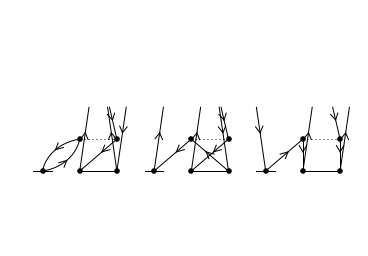

In [11]:
plot([-2,7],[-2,4.5], color = "white") #just making the diagrams scale correctly
contraction.diagram(0, [0,0], False)
contraction.diagram(1, [3,0], False)
contraction.diagram(2, [6,0], False)
axis("off")
show()

In [16]:
print contraction.code(0)


double CCa = 0.0;
for(int d = nElectrons; d < nStates; d ++){
    for(int k = 0; k < nElectrons; k ++){
        for(int c = nElectrons; c < nStates; c ++){
            CCa += vmin2(a,k)(c,d)*tf1(c)(k)*tf2(d,b)(i,j)-(vmin2(b,k)(c,d)*tf1(c)(k)*tf2(d,a)(i,j));
        }
    }
}
CCa *= -1.000000;



### 4. Higher level functions.

While the examples above deal with single filaments of the hamiltionian, the full normal ordered hamiltionian will be a sum of more than one such filaments. When setting up the CC equations we will need to consider the connection between all this filaments and all terms in the expansion of the exponential ansatz.

To handle this, we will employ some complementary functions below.

### 4.1 Complementary functions - expand_ansatz()

The function expand_ansatz(list, int) takes as input a list with each element a list-embraced operator - typically cluster operators in the cluster expansion. The integer value indicates at what order the expansion should be truncated. Note that (1) very high values of int will most likely cause a system overload, and (2) when using a hamiltonian with at most two-body interactions, no higher orders than 4 is needed due to the fact that the hamiltionian needs to connect to all cluster-operators to its right.

In the example below it is shown that any list of lists may be used as input for the expand_ansatz() function:

In [17]:
print expand_ansatz([["a"],["b"]], 3)

[[['a'], ['a'], ['a']], [['a'], ['a'], ['b']], [['a'], ['a']], [['a'], ['b'], ['b']], [['a'], ['b']], [['a']], [['b'], ['b'], ['b']], [['b'], ['b']], [['b']]]


### 4.2 Complementary functions - normal_ordered_hamiltonian()

This function is called without any arguments and returns a prewritten list of operators corresponding to the normal ordered hamiltonian in S-B. (p.280-281). It may be illustrative to see how it is set up while comparing each element to its diagrammatic counterpart:

In [18]:
def normal_ordered_hamiltonian():
    #These elements corresponds to (9.105) in S-B:
    F1 = Operator([1],[1])     #Excitation level: 0
    F2 = Operator([-1],[-1])   #E:0
    F3 = Operator([],[1,-1])   #E:+1
    F4 = Operator([1,-1],[])   #E:-1
    
    #These elements correspond to (9.107) in S-B:
    V1 = Operator([1,1],[1,1])     #E:0
    V2 = Operator([-1,-1],[-1,-1]) #E:0
    V3 = Operator([1,-1],[1,-1])   #E:0
    
    V4 = Operator([1],[1,1,-1])    #E:+1
    V5 = Operator([1,1,-1],[1])    #E:-1
    V7 = Operator([1,-1,-1],[-1])  #E:-1
    V6 = Operator([-1],[1,-1,-1])  #E:+1
    
    V9 = Operator([1,1,-1,-1],[])  #E:-2
    V8 = Operator([],[1,1,-1,-1])  #E:+2
    
    return [F1,F2,F3,F4,V1,V2,V3,V4,V5,V6,V7,V8,V9]   

### 4.3 Complementary functions - cluster_operator()

To quickly set up the $T = T_1 + T_2 + ...$ cluster operator, one may call the cluster_operator() function. This function will return a list of cluster operators, each in the order specified in the function arguments. Some examples are given below:

In [19]:
print cluster_operator([1,2,3]) # returns [T_1, T_2, T_3]

[[<__main__.Operator instance at 0x105c7c488>], [<__main__.Operator instance at 0x10e5cdcf8>], [<__main__.Operator instance at 0x10e5cd320>]]


### 5. Functions for deriving the CC equations.

So far we have introduced all the functionality needed to set up the elements in the equations, but we have not set up the equations themselves. To do this, we need yet another pair of functions.

When deriving the equations we need to consider all possible connections between hamiltonian filaments and combinations of cluster operators in the cluster expansion. Currently there are two such higher level functions available.

### 5.1 The combine_all() function

Combining all elements in the normal ordered hamiltonian with all elements in the cluster expansion will produce a high number of excited slater determinants. To see all of these we may use the combine_all() function. In the following example we set up a normal ordered hamiltonian and a list of list of cluster operators, and then we find all combinations between these operators, representing them mathematically.

In [25]:
H = normal_ordered_hamiltonian()
T_1 = Operator([],[1,-1])      #The T_1 cluster operator
T_2 = Operator([],[1,1,-1,-1]) #The T_2 operator; all lists must be normal ordered
expT = expand_ansatz([[T_1],[T_2]], 1)

tx = combine_all(H,expT, [1,0,0,0]) #The list is explained below
S = "0 = "
for i in tx:
    S+= i
Math(S)

NameError: global name 'expT' is not defined

The combine_all() function is called with the two listst of operators as parameters and a maybe cryptic list with instructions on how to represent the combinations. The list of instructions works as follows: 

[0,0,0,0] - Produce no representations, only iterate through all connections 

[1,0,0,0] - Return a string of latex-formatted expression for each connection.

[0,1,0,0] - Plot all diagrams in same figure.

[0,2,0,0] - Plot each diagram in a separate figure. (May produce a lot of diagrams.)

[0,0,1,0] - Display the report for each diagram. (Explained in section 3 above)

[0,0,0,1] - Print out the code for all diagrams.

The arguments may of course be combined if more than one index is set to non-zero values:

[1,2,1,1] - Return string, plot separate diagrams, show report and print code.

**Important:** This function is not very practical, and will most likely cause a memory overload if applied to diagrams with many permutations in the sums (due to the length of the C++ string.). For all practical purposes, the combine_to_excitation() function should be utilized in its place.

###5.2 The combine_to_excitation() function

While the combine_all() function might have som educational value, it will show a lot more diagrams than what we in reality seek. When setting up the energy- and amplitide equations, we seek only contributions that correspond to certain excitation levels. This is beause the application of the exponential ansatz connected to the hamiltonian will produce a variety of excited states using the virtual orbitals in the SD, and when solving for the amplitudes we need to project these states down on a bra SD of the target excited state. (please forgive my messy formulation)

To find only the excitation levels of interest, i.e. the contributions to each equation, we may write (using the same functions as above):

In [13]:
tx = combine_to_excitation(H,expT,1, [1,0,0,0]) #All combinations that produce excitation level 1
S = "0 ="
for i in tx:
    S+= "+"+ i
Math(S)

AttributeError: 'list' object has no attribute 'excitation'

And voila! This is basically the T1 amplitude equation in the CCSD truncation. 

Note the third argument, setting the excitation level of interest to 1. All the sums above have this excitation level. We may also display these 6 contributions to the $t_1$ amplitude equation as diagrams:

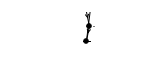

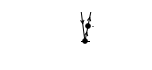

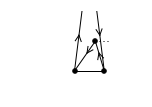

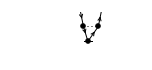

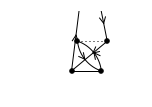

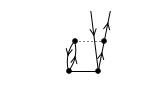

In [16]:
tx = combine_to_excitation(H,expT,1, [0,1,0,0]) #All combinations that produce excitation level 1

### 6. Deriving the CCD equations

We are now ready to derive the full CCD equations. We perform the operations in two separate cells, one for the energy and another for the $t_2$ amplitude equation. This example might be considered typical for a session where we want to produce some code for a C++ implementation for CCD. 

In [12]:
H = normal_ordered_hamiltonian()
T_2 = Operator([],[1,1,-1,-1]) 
expT = expand_ansatz([[T_2]], 4) #Natural truncation
tx = combine_to_excitation(H,expT, 0, [1,1,0,0]) #The list is explained below
S = "0 = "
for i in tx:
    S+= "+" + i
Math(S)

AttributeError: 'list' object has no attribute 'excitation'

As expected, we find only one contribution to the energy expression. People familiar with diagrammatic notation quickly recognize the CCD energy above. Now for the $t_2$ amplitude equation (in the example we return the code):

In [47]:
#tx = combine_to_excitation(H,expT, 2, [0,0,0,1]) #The list is explained below
tx = combine_to_excitation(H,expT, 2, [1,0,0,1]) #The list is explained below
S = "0 = "
for i in tx:
    S+= "+" + i
Math(S)


double CC0_0a = 0.0;
for(int c = nElectrons; c < nStates; c ++){
    CC0_0a += vmin1(a)(c)*tf2(c,b)(i,j)-(vmin1(b)(c)*tf2(c,a)(i,j));
}
CC0_0a *= -1.000000;


double CC1_0a = 0.0;
for(int k = 0; k < nElectrons; k ++){
    CC1_0a += vmin1(k)(j)*tf2(a,b)(i,k)-(vmjn1(k)(i)*tf2(a,b)(j,k));
}
CC1_0a *= 1.000000;


double CC4_0a = 0.0;
for(int d = nElectrons; d < nStates; d ++){
    for(int c = nElectrons; c < nStates; c ++){
        CC4_0a += vmin2(a,b)(c,d)*tf2(c,d)(i,j);
    }
}
CC4_0a *= 0.500000;


double CC5_0a = 0.0;
for(int l = 0; l < nElectrons; l ++){
    for(int k = 0; k < nElectrons; k ++){
        CC5_0a += vmin2(k,l)(i,j)*tf2(a,b)(k,l);
    }
}
CC5_0a *= 0.500000;


double CC6_0a = 0.0;
for(int k = 0; k < nElectrons; k ++){
    for(int c = nElectrons; c < nStates; c ++){
        CC6_0a += vmin2(a,k)(c,j)*tf2(c,b)(i,k)-(vmin2(b,k)(c,j)*tf2(c,a)(i,k))-(vmjn2(a,k)(c,i)*tf2(c,b)(j,k)-(vmjn2(b,k)(c,i)*tf2(c,a)(j,k)));
    }
}
CC6_0a *= -1.000000;


double CC12_1a = 0.0;
for(int l =

In summary, we see that CCAlgebra has a potential to simplify both the understanding and implementation of CC-equations. The code above may be copy-pasted into a C++ class file.

*Update (2.november 2014): The code above was successfully implemented into my quantum many-body solver [Fermion Mingle](http://www.github.com/audunsh/fys4411 "Fermion Mingle at Github") in C++ with some minor editing, and the code produced the exact same results I have obtained from previous benchmarking. This is a proof-of-concept, showing that CCAlg may be used to write code for solver functions.*

### 7. Deriving the CCSD equations

The CCD is considered to be the simplest of the CC equations. When we also include single excitations, we may derive the CCSD equations. As the correlation energy is given by completely closed diagrams, we should only find three possible such connections of operators. This is confirmed in the example below:

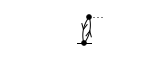

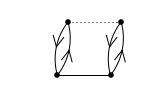

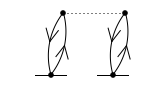

In [19]:
H = normal_ordered_hamiltonian() #Including one- and two-particle interactions
expT = expand_ansatz([[T_1],[T_2]],3)  #Taylor expand a list of lists to the 3rd order
tx = combine_to_excitation(H,expT,0, [1,1,0,0]) 
S = "0 = "
for i in tx:
    S += "+" + i
Math(S)

The expression above is identical to the energy expression presented in S-B, p.297, meaning that CCAlgebra at least solves the energy equation correctly. We proceed by deriving the $t_2$ amplitude equation:

In [20]:
tx = combine_to_excitation(H,expT,2, [1,0,0,0]) 
S = "0 = "
for i in tx:
    S += "+" + i
Math(S)

And the $t_1$ amplitude equation:

In [21]:
tx = combine_to_excitation(H,expT,1, [1,0,0,0]) 
S = "0 = "
for i in tx:
    S += "+" + i
Math(S)

### 8. Deriving the CCSDT equations

Finally we derive the CCSDT equations. This exercise shows some of the potential of using CCAlgebra, as the equations are notoriously prone to error when derived by hand due to the length and complexity of the equations.

We begin by a confirmation that the energy equation remains the same as before (as no triple amplitudes will enter the energy expression):

In [22]:
H = normal_ordered_hamiltonian() #Including one- and two-particle interactions
T_1 = Operator([],[1,-1])  #The T_1 cluster operator
T_2 = Operator([],[1,1,-1,-1]) #The T_2 operator; all lists must be normal ordered
T_3 = Operator([],[1,1,1,-1,-1,-1])
expT = expand_ansatz([[T_1],[T_2], [T_3]],4)  #Taylor expand a list of lists to the 3rd order

tx = combine_to_excitation(H,expT,0, [1,0,0,0])
s = "0 ="
for t in tx:
    s += "+" + t + "\n"
Math(s)

We then derive each amplitude equation in turn. For the $t_1$ amplitude:

In [23]:
tx = combine_to_excitation(H,expT,1, [1,0,0,0])
s = "0 ="
for t in tx:
    s += "+" + t + "\n"
Math(s)

For the $t_2$ amplitudes:

In [26]:
tx = combine_to_excitation(H,expT,2, [1,0,0,0])
s = "0 ="
for t in tx:
    s += "+" + t + "\n"
Math(s)

AttributeError: 'list' object has no attribute 'excitation'

An finally, the $t_3$ amplitude:

In [25]:
tx = combine_to_excitation(H,expT,3, [1,0,0,0])
s = "0 ="
for t in tx:
    s += "+" + t + "\n"
Math(s)

## Example section ends here. 

### Below are some scratch sessions, just ignore them

In [26]:
H = Operator([1,-1,-1],[-1])
contraction = O(H, [T_1, T_2])
for i in range(contraction.N):
    print contraction.code(i)


double CCa = 0.0;
for(int l = 0; l < nElectrons; l ++){
    for(int k = 0; k < nElectrons; k ++){
        for(int c = nElectrons; c < nStates; c ++){
            CCa += v2(k,l)(c,i)*t1(c)(k)*t2(a,b)(j,l)-(v2(k,l)(c,j)*t1(c)(k)*t2(a,b)(i,l));
        }
    }
}
double CCa *= 1.000000;


double CCb = 0.0;
for(int l = 0; l < nElectrons; l ++){
    for(int k = 0; k < nElectrons; k ++){
        for(int c = nElectrons; c < nStates; c ++){
            CCb += v2(k,l)(c,j)*t1(c)(i)*t2(a,b)(k,l)-(v2(k,l)(c,i)*t1(c)(j)*t2(a,b)(k,l));
        }
    }
}
double CCb *= 0.500000;


double CCc = 0.0;
for(int l = 0; l < nElectrons; l ++){
    for(int c = nElectrons; c < nStates; c ++){
        for(int k = 0; k < nElectrons; k ++){
            CCc += v2(k,l)(i,c)*t1(a)(k)*t2(c,b)(j,l)-(v2(k,l)(i,c)*t1(b)(k)*t2(c,a)(j,l))-(v2(k,l)(j,c)*t1(a)(k)*t2(c,b)(i,l)-(v2(k,l)(j,c)*t1(b)(k)*t2(c,a)(i,l)));
        }
    }
}
double CCc *= -1.000000;



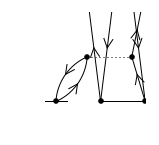

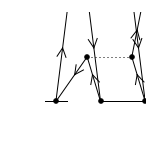

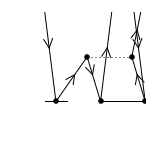

In [27]:
contraction.diagram(0, [0,0], True)
contraction.diagram(1, [0,0], True)
contraction.diagram(2, [0,0], True)

The full CCD equations is easily derived by higher order functions:

In [28]:
H = normal_ordered_hamiltonian() #Including one- and two-particle interactions
expT = expand_ansatz([[T_2]],3)  #Taylor expand a list of lists to the 3rd order

Find energy expressions:

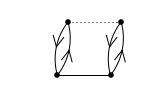

In [29]:
tx = combine_to_excitation(H,expT,0, [1,1,0,0]) #find all combinations of elements in H and expT that produce final excitation = 0

In [30]:
s = "0 ="
for t in tx:
    s += "+" + t + "\n"
Math(s)

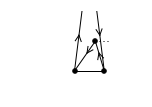

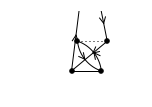

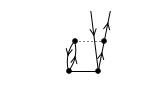

[]

In [31]:
combine_to_excitation(H,expT,1, [0,1,0,0]) #These will not contribute in CCD due to excitation level = 1

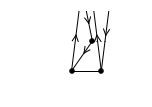

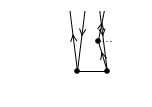

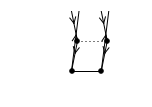

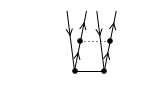

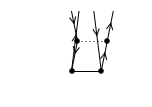

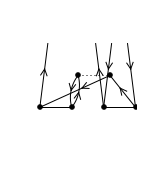

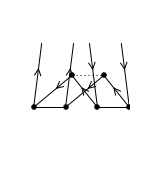

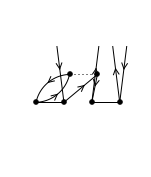

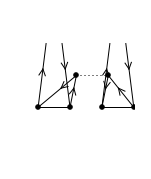

[]

In [32]:
combine_to_excitation(H,expT,2, [0,1,0,0]) #These will however contribute to the t2 amplitude equation due to excitation level = 2 

In [33]:
#The t2 amplitude equation is
tx = combine_to_excitation(H,expT,2, [1,0,0,0])
s = "0 ="
for t in tx:
    s += "+" + t + "\n"
Math(s)

In [34]:
#This means we have to write the following code for the t2 amplitude eq. of CCsolve in C++:
combine_to_excitation(H,expT,2, [0,0,0,1])


double CC0_0a = 0.0;
for(int c = nElectrons; c < nStates; c ++){
    CC0_0a += v1(a)(c)*t2(c,b)(i,j)-(v1(b)(c)*t2(c,a)(i,j));
}
double CC0_0a *= -1.000000;


double CC1_0a = 0.0;
for(int k = 0; k < nElectrons; k ++){
    CC1_0a += v1(k)(j)*t2(a,b)(i,k)-(v1(k)(i)*t2(a,b)(j,k));
}
double CC1_0a *= 1.000000;


double CC4_0a = 0.0;
for(int d = nElectrons; d < nStates; d ++){
    for(int c = nElectrons; c < nStates; c ++){
        CC4_0a += v2(a,b)(c,d)*t2(c,d)(i,j);
    }
}
double CC4_0a *= 0.500000;


double CC5_0a = 0.0;
for(int l = 0; l < nElectrons; l ++){
    for(int k = 0; k < nElectrons; k ++){
        CC5_0a += v2(k,l)(i,j)*t2(a,b)(k,l);
    }
}
double CC5_0a *= 0.500000;


double CC6_0a = 0.0;
for(int k = 0; k < nElectrons; k ++){
    for(int c = nElectrons; c < nStates; c ++){
        CC6_0a += v2(a,k)(c,j)*t2(c,b)(i,k)-(v2(b,k)(c,j)*t2(c,a)(i,k))-(v2(a,k)(c,i)*t2(c,b)(j,k)-(v2(b,k)(c,i)*t2(c,a)(j,k)));
    }
}
double CC6_0a *= -1.000000;


double CC12_1a = 0.0;
for(int l = 0; l

[]

In [35]:
#While the following code will give the correlation energy:
combine_to_excitation(H,expT,0, [0,0,0,1])


double CC12_0a = 0.0;
for(int l = 0; l < nElectrons; l ++){
    for(int k = 0; k < nElectrons; k ++){
        for(int d = nElectrons; d < nStates; d ++){
            for(int c = nElectrons; c < nStates; c ++){
                CC12_0a += v2(k,l)(c,d)*t2(c,d)(k,l);
            }
        }
    }
}
double CC12_0a *= 0.250000;



[]

The CCSD equations may be derived in the same manner:

In [36]:
H = normal_ordered_hamiltonian() #Including one- and two-particle interactions
expT = expand_ansatz([[T_1],[T_2]],2)  #Taylor expand a list of lists to the 3rd order

#Note: running the command below will likely cause a memory overload due to the length of some of the distinct diagrams representation as strings of C-code.
#tx = combine_all(H,expT, [2,0,0,0])
s = "0 ="
for t in tx:
    s += "+" + t + "\n"
Math(s)

All diagrams may be plotted in a common display frame:

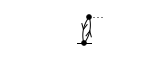

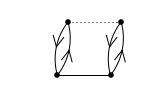

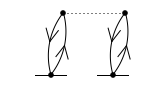

[]

In [37]:
combine_to_excitation(H,expT,0, [0,1,0,0]) #These will however contribute to the t2 amplitude equation due to excitation level = 2 

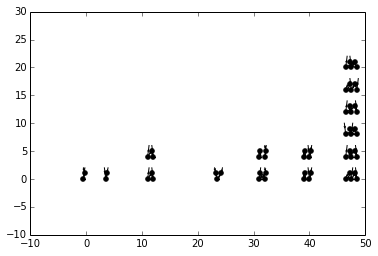

[]

In [38]:
combine_to_excitation(H,expT,1, [0,2,0,0])

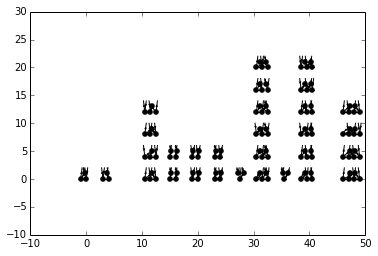

[]

In [39]:
combine_to_excitation(H,expT,2, [0,2,0,0]) 

In [40]:
H = normal_ordered_hamiltonian() #Including one- and two-particle interactions
T_1 = Operator([],[1,-1])  #The T_1 cluster operator
T_2 = Operator([],[1,1,-1,-1]) #The T_2 operator; all lists must be normal ordered
T_3 = Operator([],[1,1,1,-1,-1,-1])
expT = expand_ansatz([[T_1],[T_2], [T_3]],4)  #Taylor expand a list of lists to the 3rd order
#print expT

tx = combine_to_excitation(H,expT,3, [1,0,0,0])
s = "0 ="
for t in tx:
    s += "+" + t + "\n"
Math(s)

In [41]:
print len(expand_ansatz([["a"],["b"],["c"]], 4))

120
